**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

*   NOMBRE: Erick Alan Cuellar Quintanilla
*   MATRÍCULA: A01383577

*   NOMBRE: Fernando Alfonso Garcia
*   MATRÍCULA: A01630011

*   NOMBRE: Luis Pablo Perez Perez
*   MATRÍCULA: A01420939

*   NOMBRE: Rodolfo Antonio Vargas Díaz
*   MATRÍCULA: A01411361

In [62]:
# from google.colab import drive
# drive.mount('/content/drive')

In [63]:
import os
DIR = "C:/Coding/Masters/DataScience/Week 8 - Linear Regresison/Actividad 8"
os.chdir(DIR)

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, OrdinalEncoder, PolynomialFeatures


In [65]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [66]:
print('-'*10, 'Estadisticas descriptivas para variables numéricas','-'*10)
insurance_df.describe(include="number").T


---------- Estadisticas descriptivas para variables numéricas ----------


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [67]:
print('-'*10, 'Estadisticas descriptivas para variables categóricas','-'*10)
insurance_df.describe(include='object').T

---------- Estadisticas descriptivas para variables categóricas ----------


,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


1b) Búsqueda de valores faltantes.

In [68]:
df_lenght = insurance_df.shape[0]

print('-'*10, 'Porcentaje de valores faltantes por columna','-'*10)
print(insurance_df.isna().sum() * 100 / df_lenght)


---------- Porcentaje de valores faltantes por columna ----------
age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64


1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

['age', 'bmi', 'children', 'charges']


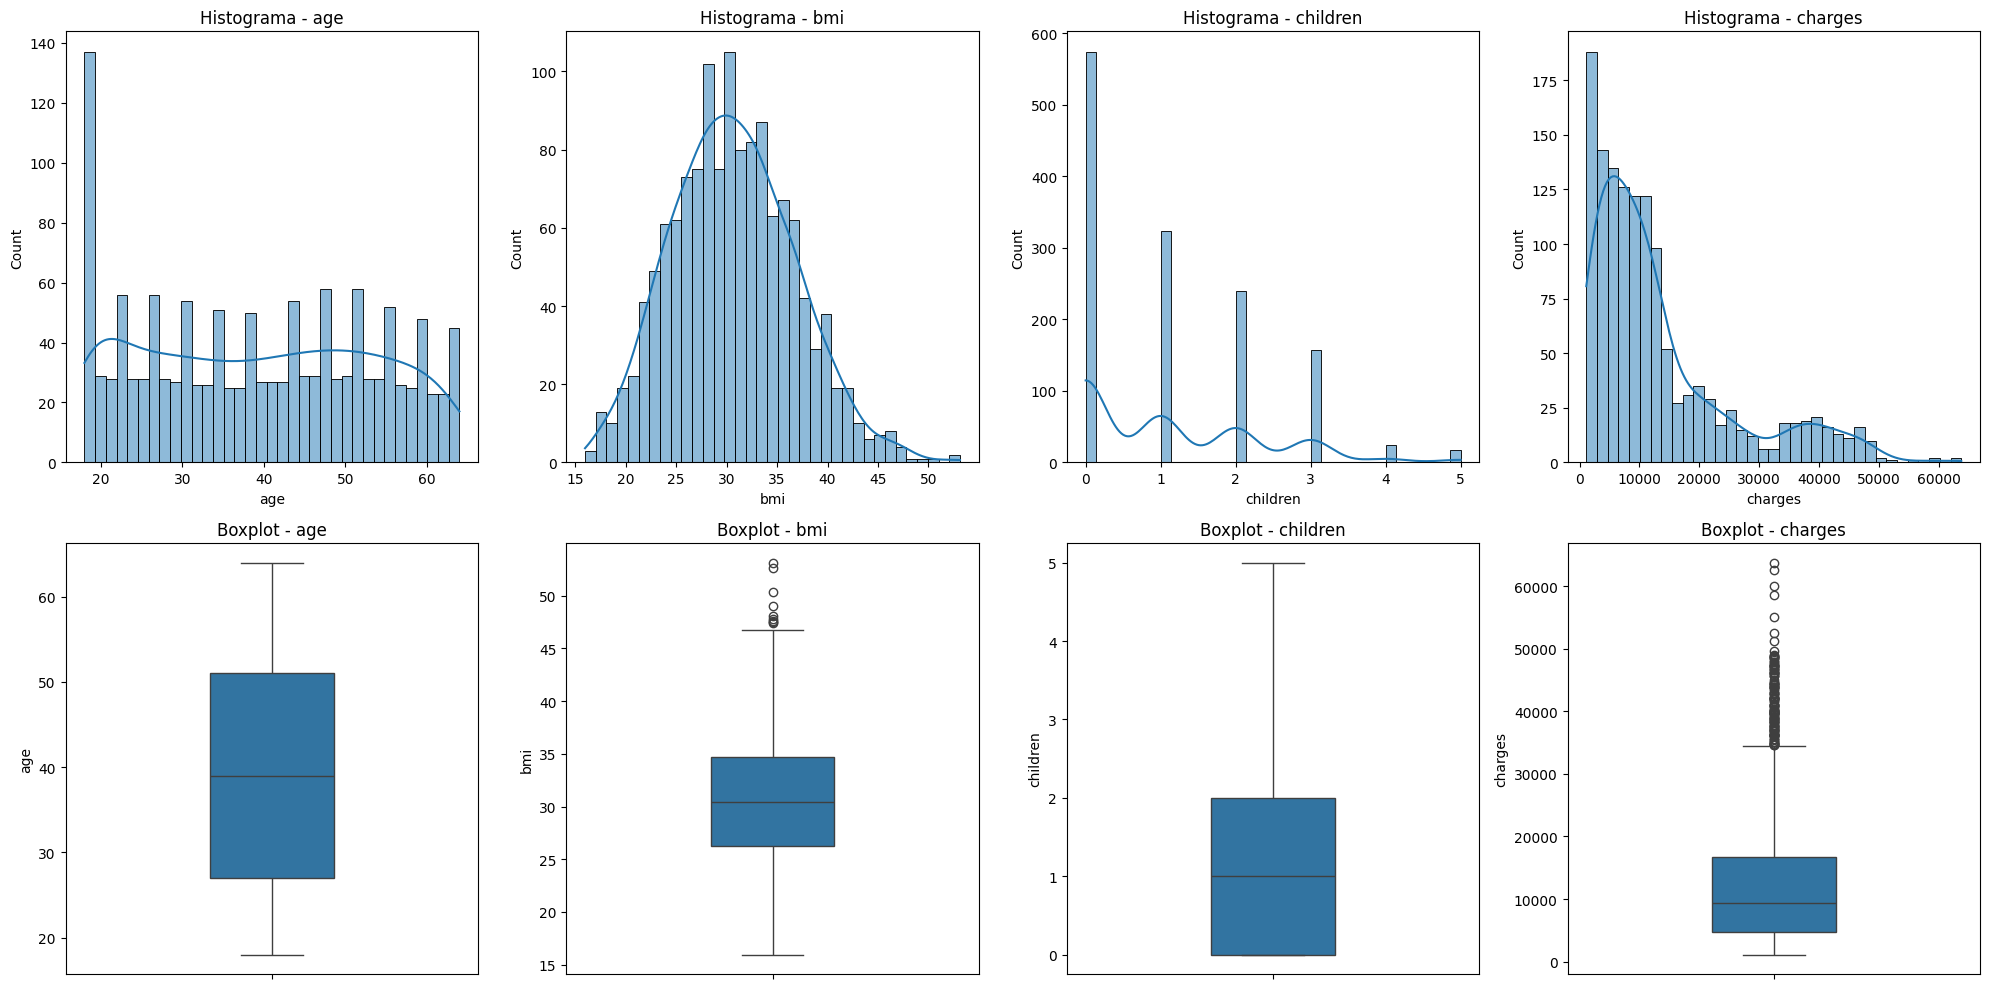

In [69]:
insurance_num_columns = insurance_df.select_dtypes(include='number').columns.to_list()
print(insurance_num_columns)

n_cols = len(insurance_num_columns)
fig, axes = plt.subplots(nrows=2, ncols=n_cols, figsize=(5 * n_cols, 10))

for i, col in enumerate(insurance_num_columns):
    # Histograma
    sns.histplot(insurance_df[col], kde=True, bins=35, ax=axes[0, i])
    axes[0, i].set_title(f'Histograma - {col}')

    # Boxplot
    sns.boxplot(y=insurance_df[col], ax=axes[1, i], width=0.3)
    axes[1, i].set_title(f'Boxplot - {col}')

plt.tight_layout()
plt.show()

['sex', 'smoker', 'region']


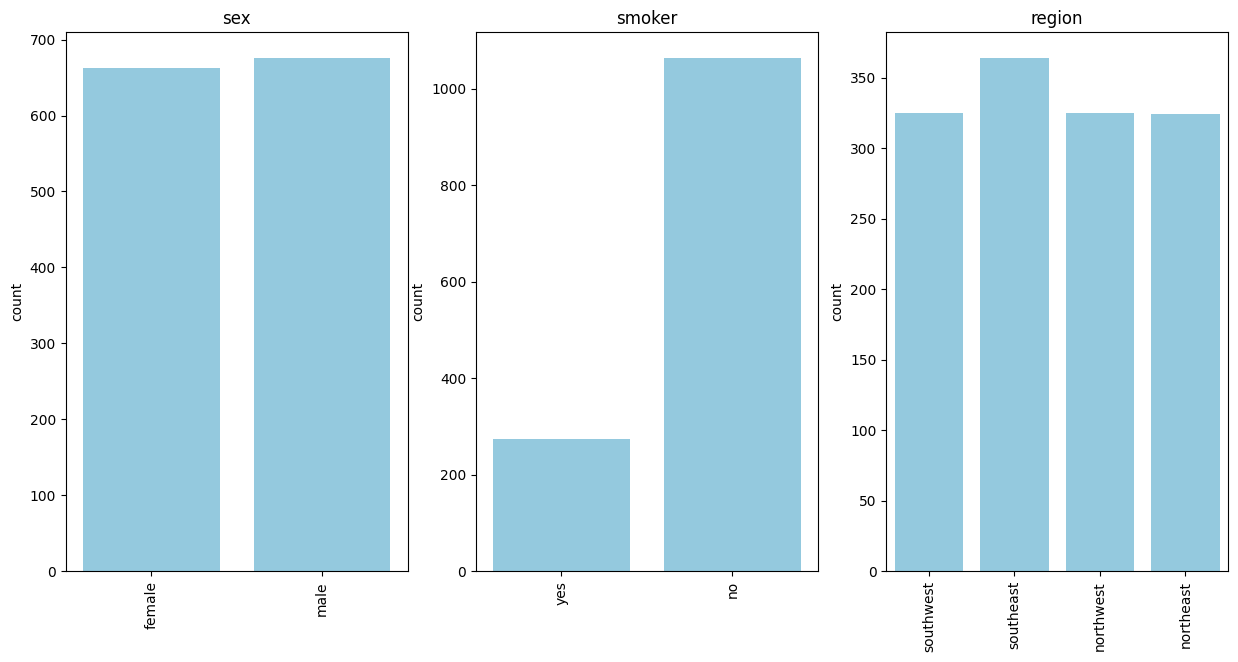

In [70]:
insurance_cat_columns = insurance_df.select_dtypes(include='object').columns.to_list()
print(insurance_cat_columns)

fig, axes = plt.subplots(1,3, figsize=(15,7))
plt.subplots_adjust(hspace=0.75)
axes = axes.ravel()
for col, ax in zip(insurance_df[insurance_cat_columns], axes):
  sns.countplot(x=col, data=insurance_df, ax=ax, color='skyblue')
  ax.set(title=f'{col}', xlabel=None)
  ax.tick_params(axis='x',rotation=90)

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

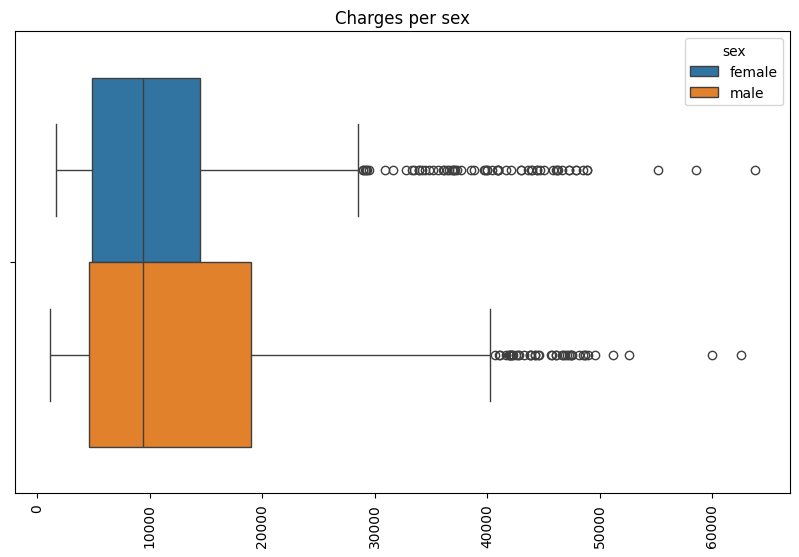

In [71]:
plt.figure(figsize=(10,6))

ax = sns.boxplot(x=insurance_df["charges"], hue=insurance_df['sex'])

ax.set(title=f'Charges per sex', xlabel=None)
ax.tick_params(axis='x',rotation=90)

plt.show()

* La media para hombres y mujeres es practicamente igual, el rango es mayor en las mujeres pero hay más outliers en los hombres.

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

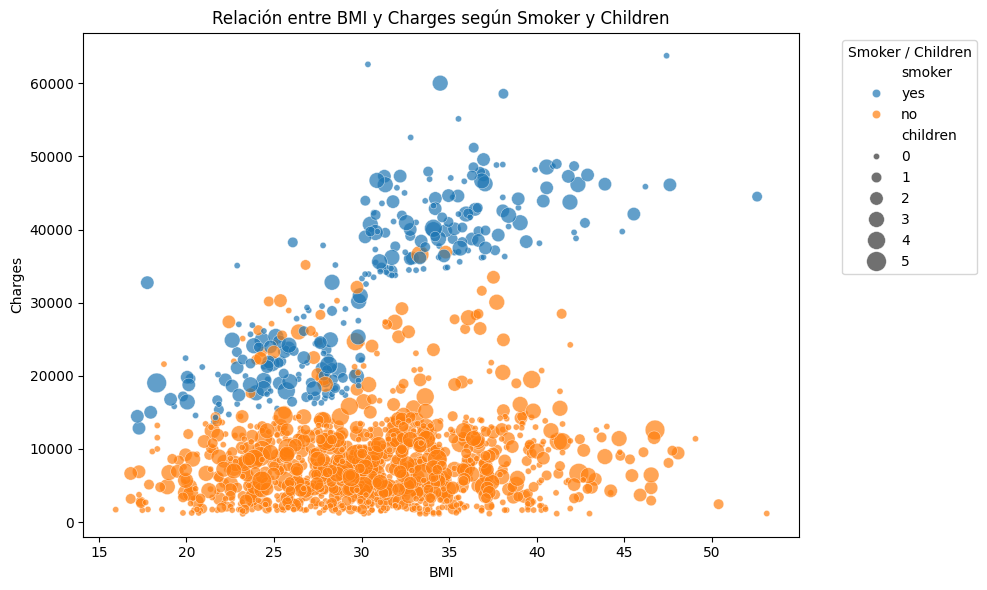

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=insurance_df, x='bmi', y='charges', hue='smoker', size='children', sizes=(20, 200), alpha=0.7)

plt.title('Relación entre BMI y Charges según Smoker y Children')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker / Children', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

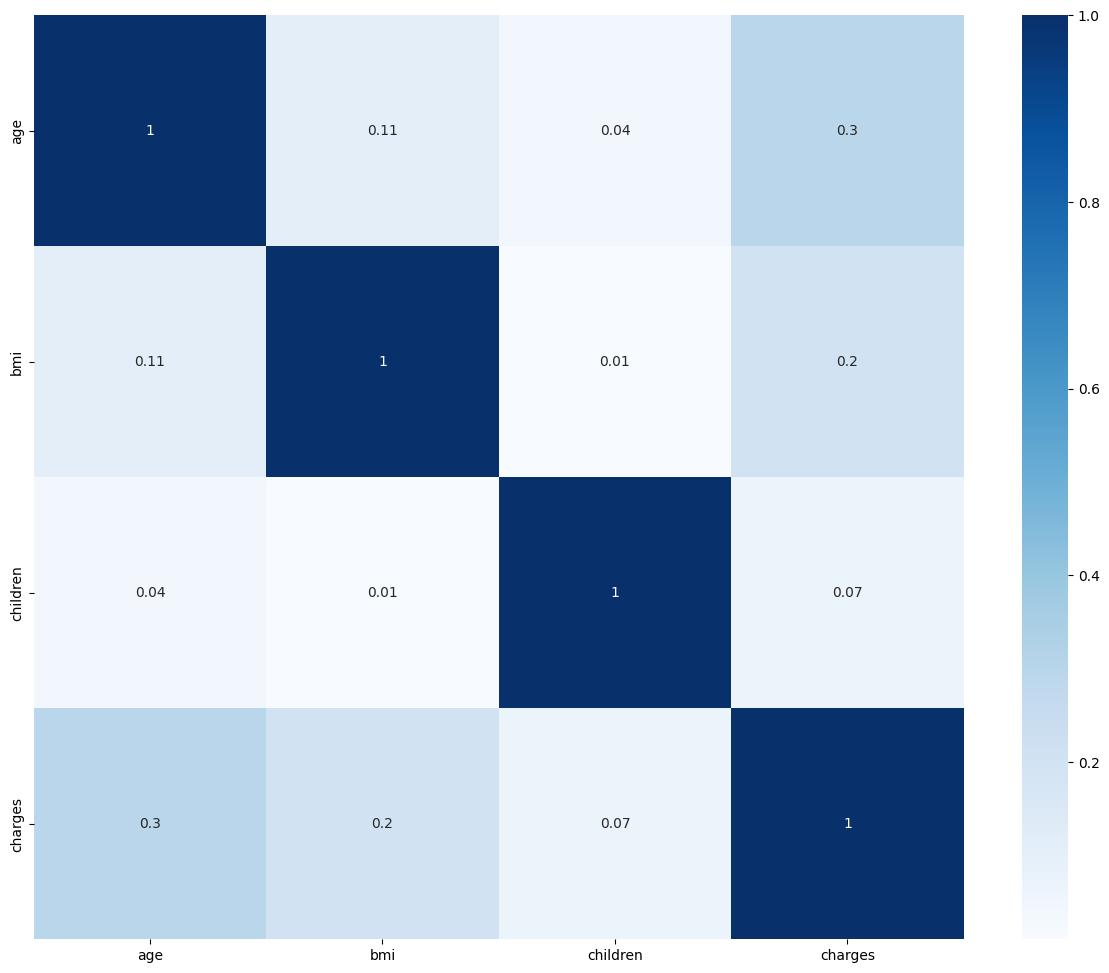

In [73]:
plt.figure(figsize = (15, 12))
sns.heatmap(round(insurance_df.corr(numeric_only=True),2), cmap="Blues", annot = True)
plt.show()

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi` en el dataframe de valores atípicos obtenido?

In [74]:

def keep_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    print(q1, q3)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    print(lower, upper)
    initial = df.shape[0]
    df = df[(df[col] < lower) | (df[col] > upper)]
    final = df.shape[0]
    print(f"{col} - Registros eliminados: {round((initial - final)/initial * 100, 2)}%")
    return df, upper


outliers_df, upper_limit = keep_outliers(insurance_df, 'charges')

print(f"Media de edad para outliers de charges: {outliers_df['age'].mean()}")
print(f"Media de BMI para outliers de charges: {outliers_df['bmi'].mean()}")

4740.28715 16639.912515
-13109.1508975 34489.350562499996
charges - Registros eliminados: 89.61%
Media de edad para outliers de charges: 41.07913669064748
Media de BMI para outliers de charges: 35.564604316546756


3b) ¿Qué porcentaje de estas observaciones (en el dataframe de valores atípicos obtenidos) se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

In [75]:
print("-"*10, f"Mujeres vs Hombres de outliers", "-"*10)
print(outliers_df["sex"].value_counts() * 100 / outliers_df.shape[0])

print("-"*10, f"Fumadores vs No Fumadores de outliers", "-"*10)
print(outliers_df["smoker"].value_counts() * 100 / outliers_df.shape[0])


---------- Mujeres vs Hombres de outliers ----------
sex
male      64.028777
female    35.971223
Name: count, dtype: float64
---------- Fumadores vs No Fumadores de outliers ----------
smoker
yes    97.841727
no      2.158273
Name: count, dtype: float64


# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [76]:
X, y = insurance_df.drop(columns="charges"), insurance_df["charges"]
X, y

(      age     sex     bmi  children smoker     region
 0      19  female  27.900         0    yes  southwest
 1      18    male  33.770         1     no  southeast
 2      28    male  33.000         3     no  southeast
 3      33    male  22.705         0     no  northwest
 4      32    male  28.880         0     no  northwest
 ...   ...     ...     ...       ...    ...        ...
 1333   50    male  30.970         3     no  northwest
 1334   18  female  31.920         0     no  northeast
 1335   18  female  36.850         0     no  southeast
 1336   21  female  25.800         0     no  southwest
 1337   61  female  29.070         0    yes  northwest
 
 [1338 rows x 6 columns],
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1338, dtype: float64)

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [77]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=insurance_df['smoker'])

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [78]:

num_pipeline = Pipeline([("Scaler", MinMaxScaler())])
cat_pipeline = Pipeline([("Encoder", OneHotEncoder(drop='first'))])

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)))


# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [79]:

# Se crea el pipeline para la predicción, que incluye el de procesamiento creado anteriormente y la regresión lineal
lr_model = make_pipeline(preprocessing, LinearRegression())
lr_model.fit(X_train, y_train)
predictions = lr_model.predict(X_test)

print('The Root Mean Square Error (RMSE) is:', root_mean_squared_error(y_test, predictions))
print('The R square (R2) is:', r2_score(y_test, predictions))

The Root Mean Square Error (RMSE) is: 5698.759784532358
The R square (R2) is: 0.7538547215244323


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`) que obtuviste en la pregunta 3a. Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


In [80]:
# FE

insurance_df.loc[insurance_df['charges'] > upper_limit, 'charges'] = upper_limit


In [81]:
# Split data again
x, y = insurance_df.drop(columns="charges"), insurance_df["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=insurance_df['smoker'])

# Scale
num_pipeline = Pipeline([("Scaler", MinMaxScaler())])
cat_pipeline = Pipeline([("Encoder", OneHotEncoder(drop='first'))])

# Retrain

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)))

lr_model_2 = make_pipeline(preprocessing, LinearRegression())
lr_model_2.fit(X_train, y_train)
predictions = lr_model_2.predict(X_test)
print('The Root Mean Square Error (RMSE) is:', root_mean_squared_error(y_test, predictions))
print('The R square (R2) is:', r2_score(y_test, predictions))

The Root Mean Square Error (RMSE) is: 4812.061728319821
The R square (R2) is: 0.7637776364359081


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [82]:

# # Scale
num_pipeline = Pipeline([("Scaler", StandardScaler())])
cat_pipeline = Pipeline([("Encoder", OrdinalEncoder())])

# Retrain

preprocessing2 = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)))

lr_model_3 = make_pipeline(preprocessing2, LinearRegression())
lr_model_3.fit(X_train, y_train)
predictions = lr_model_3.predict(X_test)

print('The Root Mean Square Error (RMSE) is:', root_mean_squared_error(y_test, predictions))
print('The R square (R2) is:', r2_score(y_test, predictions))

The Root Mean Square Error (RMSE) is: 4811.600670456455
The R square (R2) is: 0.7638229005936741


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [83]:

lr_model_4 = make_pipeline(preprocessing2, PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
lr_model_4.fit(X_train, y_train)
predictions = lr_model_4.predict(X_test)

print('The Root Mean Square Error (RMSE) is:', root_mean_squared_error(y_test, predictions))
print('The R square (R2) is:', r2_score(y_test, predictions))

The Root Mean Square Error (RMSE) is: 4285.57031096556
The R square (R2) is: 0.8126404302016094
